<a href="https://colab.research.google.com/github/Charlesphilip6/Charlesgeospatial/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Supervise Learning#

from sklearn.linear_model import LinearRegression
import numpy as np
# Sample data: Hours studied vs Scores
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([50, 55, 65, 70, 75])

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict
new_study_hours = np.array([[6]])
predicted_score = model.predict(new_study_hours)
print(predicted_score)


[82.5]


In [ ]:
#Example 2#
from sklearn.linear_model import LinearRegression
import numpy as np
#Sample Data: Hours work  vs Hours pay
X = np.array([[1], [2], [3], [5], [6], [7]])  # Note the extra bracket in each value
Y = np.array([50, 55, 65, 75, 85, 95])

#Create and train Model
model = LinearRegression()
model.fit(X,Y)

#Predict
new_work_hours = np.array([[4]])
predicted_pay = model.predict(new_work_hours)
print(predicted_pay)



[70.83333333]


**Machine Learning Data with Supervise Learning**

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 205 to 205
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1 non-null      int64  
 1   sex         1 non-null      int64  
 2   cp          1 non-null      int64  
 3   trestbps    1 non-null      float64
 4   chol        1 non-null      float64
 5   fbs         1 non-null      float64
 6   restecg     1 non-null      float64
 7   thalach     1 non-null      float64
 8   exang       1 non-null      float64
 9   oldpeak     1 non-null      float64
 10  slope       1 non-null      float64
 11  ca          1 non-null      float64
 12  thal        1 non-null      float64
 13  num         1 non-null      int64  
dtypes: float64(10), int64(4)
memory usage: 120.0 bytes
Accuracy: 0.7457627118644068
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        38
           1       0.61   

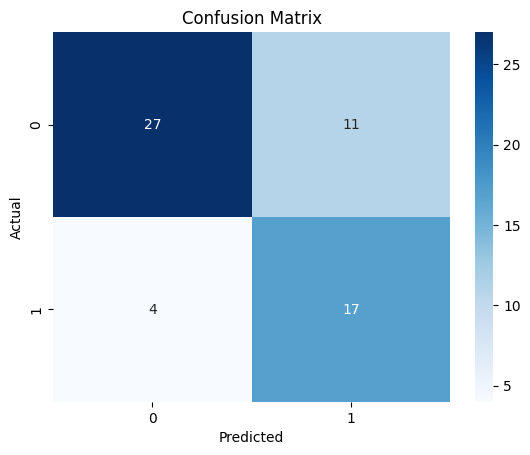

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Heart disease data.csv")

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)

# Convert object columns that should be numeric
cols_to_convert = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm cleanup
df.info()

#Define Features and Labels
# Clean up column names
df.columns = df.columns.str.strip()

# Now define Features and Labels
X = df.drop("num", axis=1)
y = df["num"]

y = (df["num"] > 0).astype(int)  # 0 = no disease, 1 = has disease

import pandas as pd
import numpy as np

df = pd.read_csv("Heart disease data.csv")
df.replace("?", np.nan, inplace=True)
df.columns = df.columns.str.strip()

# Columns to convert
numeric_cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values safely
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Features and Labels
X = df.drop("num", axis=1)
y = df["num"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Sample Data: Hours worked vs Hours pay
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
Y = np.array([50, 55, 65, 70, 75, 80, 85, 90, 95, 100])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 8
Testing set size: 2


Saving synthetic_customer_data.csv to synthetic_customer_data.csv


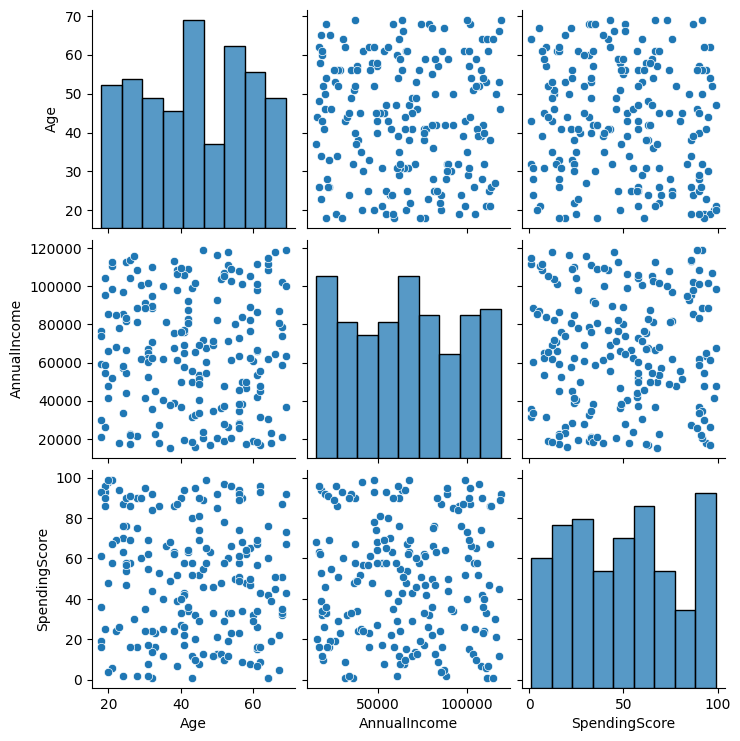

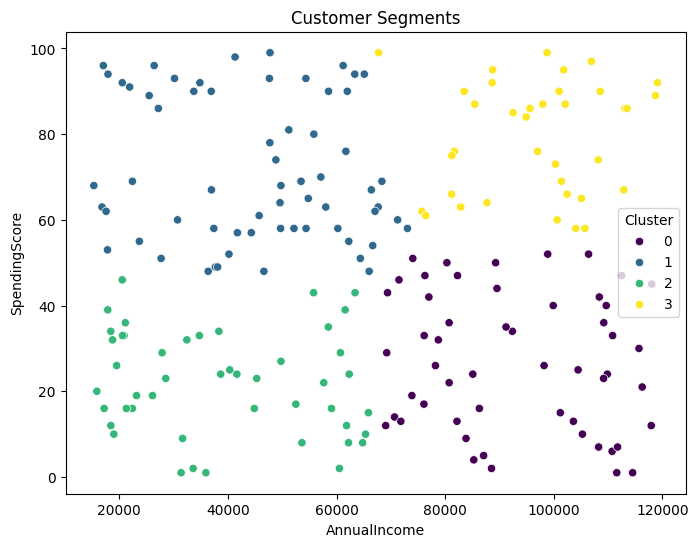

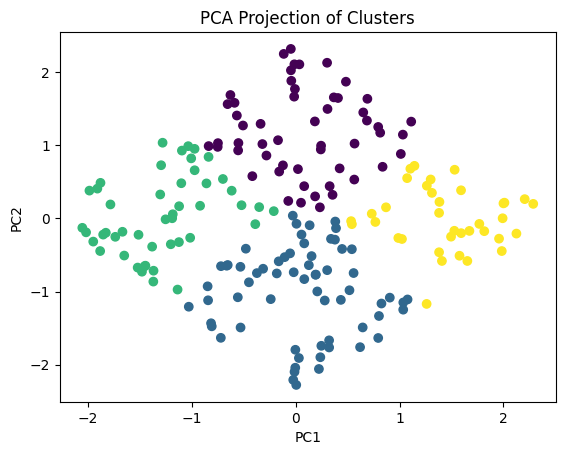

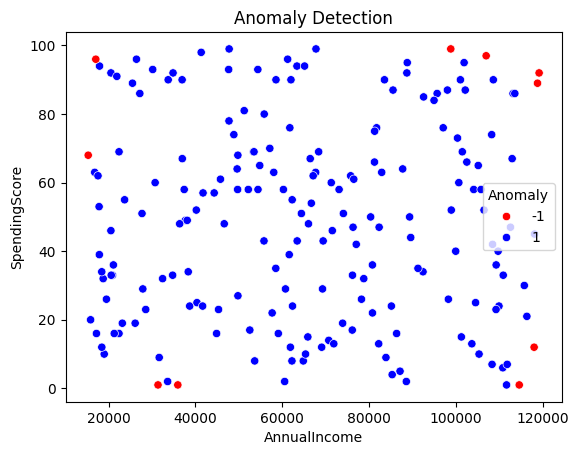

In [ ]:
#UNSUPERVISED LEARNING#

from google.colab import files
uploaded = files.upload()

#import Libraries#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

#import data#

df = pd.read_csv("synthetic_customer_data.csv")
df.head()

#Visualize the Data#
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

#KMEAN CLUSTERING#
X = df[['AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()


#PCA ANALYSIS#
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#ANOMALY DETECTION WITH ISLOATION FOREST#
clf = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = clf.fit_predict(X_scaled)

# Visualize anomalies
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection')
plt.show()

